<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Byan Alfredo Solorzano Montero<br>

Fecha: 04/08/2022

# Importación de librerias necesarias

In [1]:
from numpy import random
import os
import glob as gb
import pandas as pd
from pylab import *
from matplotlib import pyplot
import matplotlib.pyplot as plt
from skimage import io
#------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

## Cargar el Dataset

In [26]:
train_data = []
for clase_tipo, sp in enumerate(nombre_clases):
    for file in os.listdir(os.path.join(ruta_origen, sp+'/')):
        train_data.append(['{}/{}'.format(sp, file), clase_tipo, sp])
        
        clase_tipo = np.array(clase_tipo, dtype = 'float32')
        
data = pd.DataFrame(train_data, columns=['Imagen', 'Clase_ID','Clase_Tipo'])
data

,Imagen,Clase_ID,Clase_Tipo
0,AcostaNataly/L00380424_1.jpg,0,AcostaNataly
1,AcostaNataly/L00380424_2.jpg,0.0,AcostaNataly
2,AcostaNataly/L00380424_3.jpg,0.0,AcostaNataly
3,ArielChabla/L00376418_1.jpg,1,ArielChabla
4,ArielChabla/L00376418_2.jpg,1.0,ArielChabla
...,...,...,...
73,WilmerSolano/L00392980_2.jpeg,24.0,WilmerSolano
74,WilmerSolano/L00392980_3.jpeg,24.0,WilmerSolano
75,ZambranoJhon/L00392993_Centro.png,25,ZambranoJhon
76,ZambranoJhon/L00392993_LD.png,25.0,ZambranoJhon


In [28]:
long =len(data.index)
print(long)

78


In [3]:
ruta_origen = './recursos/clases'
nombre_clases = os.listdir(ruta_origen + '/')
nombre_clases.sort()
print(f"Clases de la variable objetivo: "+str(nombre_clases))

Clases de la variable objetivo: ['AcostaNataly', 'ArielChabla', 'ArroboMercy', 'BarraganSteven', 'BorjaLeonardo', 'Borrero Jorge', 'CedeñoHector', 'CevallosJoan', 'EnriquezSelena', 'EspinosaJordan', 'GoyesAnthony', 'HerediaGenesis', 'LucioCarlos', 'LópezMelany', 'MasacheFernando', 'MosqueraLucy', 'OlallaLuis', 'PauteKevin', 'PárragaMaríaJosé', 'RaymondDávila', 'RivasSelena', 'RuizJose', 'SalazarJohana', 'SolórzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [4]:
for carpeta in  os.listdir(ruta_origen + '/') : 
    archivo = gb.glob(pathname= str( ruta_origen + '/' + carpeta + '/*'))
    print(f'Se encontró un total de {len(archivo)} fotos en la clase {carpeta}')

Se encontró un total de 3 fotos en la clase AcostaNataly
Se encontró un total de 3 fotos en la clase ArielChabla
Se encontró un total de 3 fotos en la clase ArroboMercy
Se encontró un total de 3 fotos en la clase BarraganSteven
Se encontró un total de 3 fotos en la clase BorjaLeonardo
Se encontró un total de 3 fotos en la clase Borrero Jorge
Se encontró un total de 3 fotos en la clase CedeñoHector
Se encontró un total de 3 fotos en la clase CevallosJoan
Se encontró un total de 3 fotos en la clase EnriquezSelena
Se encontró un total de 3 fotos en la clase EspinosaJordan
Se encontró un total de 3 fotos en la clase GoyesAnthony
Se encontró un total de 3 fotos en la clase HerediaGenesis
Se encontró un total de 3 fotos en la clase LucioCarlos
Se encontró un total de 3 fotos en la clase LópezMelany
Se encontró un total de 3 fotos en la clase MasacheFernando
Se encontró un total de 3 fotos en la clase MosqueraLucy
Se encontró un total de 3 fotos en la clase OlallaLuis
Se encontró un total de 

In [15]:
imagenes = []
for elemento in nombre_clases: 
    ruta_actual = ruta_origen + '/' + elemento
    archivos = os.listdir(ruta_actual)
    for archivo in archivos: 
        # imread lee las imagenes con los pixeles codificados como enteros 
        imagenes.append(io.imread(ruta_origen + '/' + elemento +'/'+ archivo)/255.0)

Dimensiones de la imagen: (591, 591, 3)


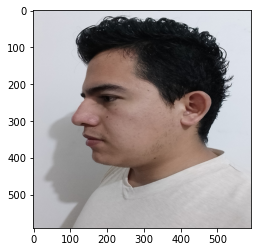

Dimensiones de la imagen: (238, 192, 4)


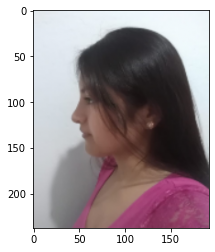

Dimensiones de la imagen: (3583, 2777, 3)


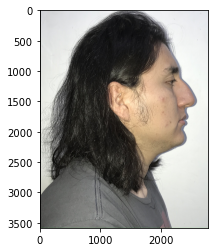

Dimensiones de la imagen: (801, 600, 3)


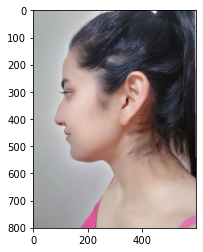

Dimensiones de la imagen: (192, 193, 3)


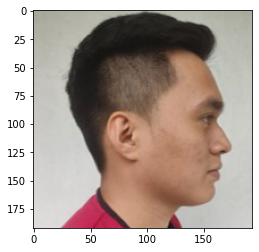

Dimensiones de la imagen: (801, 600, 3)


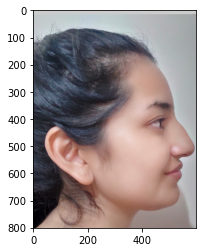

Dimensiones de la imagen: (3665, 2841, 3)


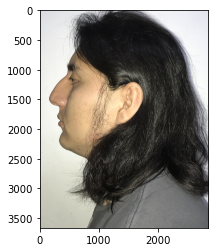

Dimensiones de la imagen: (192, 192, 3)


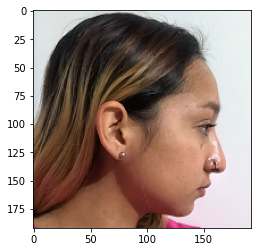

Dimensiones de la imagen: (192, 192, 4)


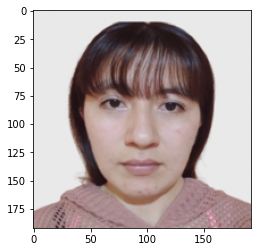

In [21]:
import random as rand
for iterador in range(9):
    aleatorio = rand.randint(0, len(imagenes) - 1)
    print(f"Dimensiones de la imagen: " + 
          str(imagenes[aleatorio].shape))
    plt.imshow(imagenes[aleatorio],vmin=0,vmax=1)
    plt.show()

## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [3]:
#Código que responde a la descripción anterior

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [4]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)


## División del dataset en datos de entrenamiento y datos de test 

In [5]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Modelamiento

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 